In [1]:
import os
import copy 

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from keras.models import load_model
from keras.utils.generic_utils import get_custom_objects
from keras.backend import binary_crossentropy, backend

from loss_functions import jaccard_coef_loss, jaccard_coef_int

Using TensorFlow backend.


In [4]:
# Load weights and associate the custom jaccard loss function.
weight_path = 'augmented_weights_01.hdf5'
model = load_model(weight_path, custom_objects={'jaccard_coef_loss': jaccard_coef_loss, 
                                                'jaccard_coef_int': jaccard_coef_int})

/anaconda/envs/stanford/lib/python3.6/site-packages/keras/engine/topology.py:1271: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [5]:
# Data examples - before and after earthquake images.
path = '/Users/Orchestrator/Documents/Ambition/Projects/AngelHackLondon/data/buildings_set/high_res_amatrice/'
before = path + 'img_earthquake_after_small_2017.jpg'
after = path + 'img_earthquake_before_small_2016.jpg'

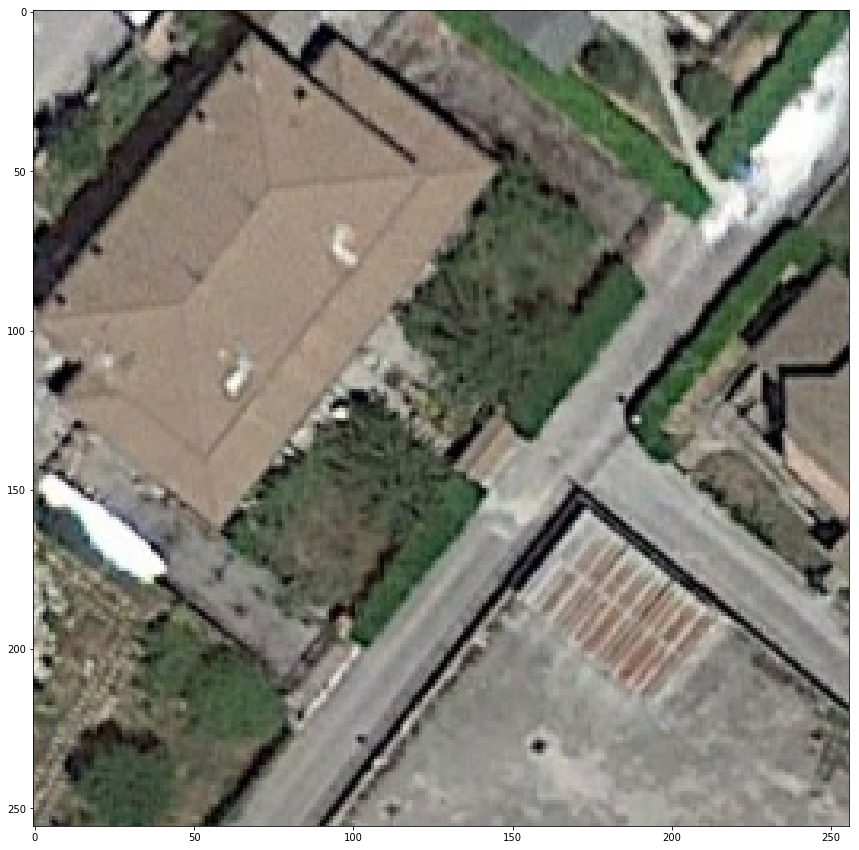

In [9]:
crop = np.array(Image.open(before))[2000:2256, -856:-600]
plt.figure(figsize=(15, 15))
plt.imshow(crop)
plt.show()

In [10]:
# Prediction
out = model.predict(np.expand_dims(crop, axis=0))

In [11]:
# Prediction mask. 
img = Image.fromarray(crop)
mask = np.zeros((256, 256, 3), dtype=np.uint8)
tmp = copy.deepcopy(out[0,...,0])
tmp[tmp > 0.1] = 255
mask[:,:,0] = tmp
mask = Image.fromarray(mask)

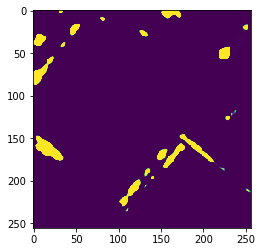

In [24]:
# Overlapped image.
plt.imshow(out.reshape(256,256))
plt.show()